In [424]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [503]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons


In [504]:
X, Y = make_moons(n_samples=2000,  shuffle=True,  noise=0.25, random_state=3)

In [505]:
print(X.shape, Y.shape)

(2000, 2) (2000,)


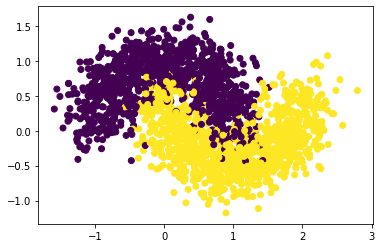

In [506]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

In [507]:
input_size = 2
layers = [4, 3]
output = 2

In [508]:
# a = np.array([[10, 20], [30, 40]])
# print(np.sum(a, axis = 1, keepdims=True))

In [509]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [510]:
softmax(np.array([[10, 20], [20, 20]])) # higher the activation higher the probablity

array([[4.53978687e-05, 9.99954602e-01],
       [5.00000000e-01, 5.00000000e-01]])

In [511]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [512]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [513]:
one_hot(np.array([0, 0, 1, 2]), 3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [514]:
from sklearn.model_selection import train_test_split

In [515]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [517]:
# def train(x, y):
#     losses = []
#     y_oht = one_hot(y, depth=2)
#     for i in range(100):
#         y_ = model.forward(X)
#         l = loss(y_oht, y_)
#         losses.append(l)
#         if l >= 0.01:
#             model.backward(X, y_oht)
            
model = NeuralNetwork(input_size=2,  layers=layers, output_size=2)
def train(x,y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    y_oht = one_hot(y,classes)
    losses = []
    for ix in range(epochs):
        y_ = model.forward(x)
        l = loss(y_oht,y_)
        losses.append(l)
        model.backward(x,y_oht,learning_rate=0.001)
#         if(logs and ix%10==0):
#             print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    
    
    return losses
    #model.summary()
            

In [518]:
losses = train(X_test, Y_test, model, epochs=3000)

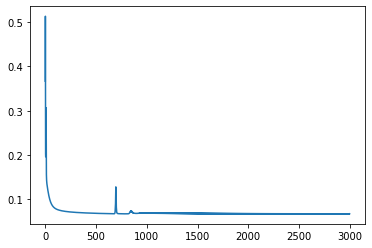

In [519]:
plt.plot(losses);

In [520]:
import sys
sys.path.insert(0, '../resources/')

In [521]:
from visualize import plot_decision_boundary

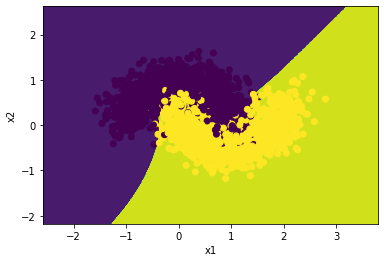

In [522]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [523]:
import sklearn.metrics as m

In [524]:
m.accuracy_score(model.predict(X_train), Y_train)

0.9392857142857143

In [525]:
m.accuracy_score(model.predict(X_test), Y_test)

0.95

In [526]:
X = np.array([[0, 0],[0, 1],[1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

In [527]:
losses = train(X, Y, model, epochs=3000)

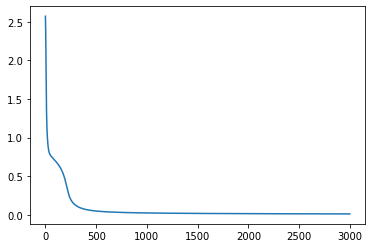

In [528]:
plt.plot(losses)

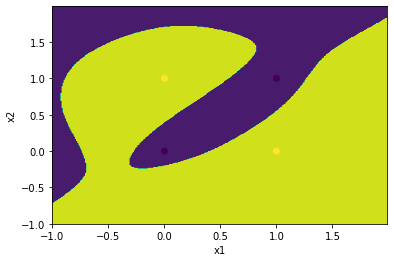

In [529]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)